## Оптимизация выполнения кода, векторизация, Numba

Материалы:
* Макрушин С.В. Лекция 3: Оптимизация выполнения кода, векторизация, Numba
* IPython Cookbook, Second Edition (2018), глава 4
* https://numba.pydata.org/numba-doc/latest/user/5minguide.html

## Задачи для совместного разбора

1. Сгенерируйте массив `A` из `N=1млн` случайных целых чисел на отрезке от 0 до 1000. Пусть `B[i] = A[i] + 100`. Посчитайте среднее значение массива `B`.

In [ ]:
from numba import jit
import numpy as np
import random

In [ ]:
N = 1000000

A = [random.randint(0, 1000) for i in range(N)]
B = [a + 100 for a in A]

mean_B = sum(B) / N
print(mean_B)



600.171302


2. Создайте таблицу 2млн строк и с 4 столбцами, заполненными случайными числами. Добавьте столбец `key`, которые содержит элементы из множества английских букв. Выберите из таблицы подмножество строк, для которых в столбце `key` указаны первые 5 английских букв.

In [ ]:
import random
import string
import pandas as pd
from numba import jit


In [ ]:
N = 2000000

# # генерируем случайные числа для каждого столбца
col1 = [random.randint(0, 1000) for i in range(N)]
col2 = [random.randint(0, 1000) for i in range(N)]
col3 = [random.randint(0, 1000) for i in range(N)]
col4 = [random.randint(0, 1000) for i in range(N)]
table = pd.DataFrame({'col1': col1, 'col2': col2, 'col3': col3, 'col4': col4})


# генерируем случайные буквы для столбца key
letters = string.ascii_uppercase
NEWcol5 = [''.join(random.choices(letters, k=random.randint(5,5))) for i in range(N)]

table['key'] = NEWcol5
table[table['key'] == 'ABCDE']




,col1,col2,col3,col4,key
1076600,213,643,342,353,ABCDE


## Лабораторная работа 3

In [ ]:
!pip install line_profiler

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 661.9/661.9 kB 10.1 MB/s eta 0:00:00


1. В файлах `recipes_sample.csv` и `reviews_sample.csv` (__ЛР 2__) находится информация об рецептах блюд и отзывах на эти рецепты соответственно. Загрузите данные из файлов в виде `pd.DataFrame` с названиями `recipes` и `reviews`. Обратите внимание на корректное считывание столбца(ов) с индексами. Приведите столбцы к нужным типам.

Реализуйте несколько вариантов функции подсчета среднего значения столбца `rating` из таблицы `reviews` для отзывов, оставленных в 2010 году.

A. С использованием метода `DataFrame.iterrows` исходной таблицы;

Б. С использованием метода `DataFrame.iterrows` таблицы, в которой сохранены только отзывы за 2010 год;

В. С использованием метода `Series.mean`.

Проверьте, что результаты работы всех написанных функций корректны и совпадают. Измерьте выполнения всех написанных функций.


In [ ]:
recipes = pd.read_csv('recipes_sample.csv')
recipes

,name,id,minutes,contributor_id,submitted,n_steps,description,n_ingredients
0,george s at the cove black bean soup,44123,90,35193,2002-10-25,NaN,an original recipe created by chef scott meska...,18.0
1,healthy for them yogurt popsicles,67664,10,91970,2003-07-26,NaN,my children and their friends ask for my homem...,NaN
2,i can t believe it s spinach,38798,30,1533,2002-08-29,NaN,"these were so go, it surprised even me.",8.0
3,italian gut busters,35173,45,22724,2002-07-27,NaN,my sister-in-law made these for us at a family...,NaN
4,love is in the air beef fondue sauces,84797,25,4470,2004-02-23,4.0,i think a fondue is a very romantic casual din...,NaN
...,...,...,...,...,...,...,...,...
29995,zurie s holey rustic olive and cheddar bread,267661,80,200862,2007-11-25,16.0,this is based on a french recipe but i changed...,10.0
29996,zwetschgenkuchen bavarian plum cake,386977,240,177443,2009-08-24,NaN,"this is a traditional fresh plum cake, thought...",11.0
29997,zwiebelkuchen southwest german onion cake,103312,75,161745,2004-11-03,NaN,this is a traditional late summer early fall s...,NaN
29998,zydeco soup,486161,60,227978,2012-08-29,NaN,this is a delicious soup that i originally fou...,NaN


In [ ]:
reviews = pd.read_csv('reviews_sample.csv')
reviews

,Unnamed: 0,user_id,recipe_id,date,rating,review
0,370476,21752,57993,2003-05-01,5,Last week whole sides of frozen salmon fillet ...
1,624300,431813,142201,2007-09-16,5,So simple and so tasty! I used a yellow capsi...
2,187037,400708,252013,2008-01-10,4,"Very nice breakfast HH, easy to make and yummy..."
3,706134,2001852463,404716,2017-12-11,5,These are a favorite for the holidays and so e...
4,312179,95810,129396,2008-03-14,5,Excellent soup! The tomato flavor is just gre...
...,...,...,...,...,...,...
126691,1013457,1270706,335534,2009-05-17,4,This recipe was great! I made it last night. I...
126692,158736,2282344,8701,2012-06-03,0,This recipe is outstanding. I followed the rec...
126693,1059834,689540,222001,2008-04-08,5,"Well, we were not a crowd but it was a fabulou..."
126694,453285,2000242659,354979,2015-06-02,5,I have been a steak eater and dedicated BBQ gr...


In [ ]:
def middle():
  rating = 0
  q = 0

  for index, row in reviews.iterrows():
    if row['date'] >= '2010-01-01' and  row['date'] < '2011-01-01':
      rating += row['rating']
      q += 1
  print('Средний рейтинг рецептов за 2010 год: ', rating / q)

middle()
%time

Средний рейтинг рецептов за 2010 год:  4.4544402182900615
CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 6.2 µs


In [ ]:
rating1 = reviews[(reviews['date'] >= '2010-01-01') & (reviews['date'] < '2011-01-01')]

def middle2():
  rating = 0
  q = 0
  for index, row in rating1.iterrows():
    rating += row['rating']
    q += 1
  print('Средний рейтинг рецептов за 2010 год: ', rating / q)

middle2()
%time

Средний рейтинг рецептов за 2010 год:  4.4544402182900615
CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 8.34 µs


In [ ]:
def middle3():
  print('Средний рейтинг рецептов за 2010 год: ', reviews[(reviews['date'] >= '2010-01-01') & (reviews['date'] < '2011-01-01')]['rating'].mean())

middle3()
%time

Средний рейтинг рецептов за 2010 год:  4.4544402182900615
CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.48 µs


2. Какая из созданных функций выполняется медленнее? Что наиболее сильно влияет на скорость выполнения? Для ответа использовать профайлер `line_profiler`. Сохраните результаты работы профайлера в отдельную текстовую ячейку и прокомментируйте результаты его работы.

(*). Сможете ли вы ускорить работу функции 1Б, отказавшись от использования метода `iterrows`, но не используя метод `mean`?

In [ ]:
@jit
def opti_middle2():
  print('Средний рейтинг рецептов за 2010 год: ', rating1['rating'].sum()/ rating1['rating'].count())

opti_middle2()
%time

Средний рейтинг рецептов за 2010 год:  4.4544402182900615
CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.72 µs


<ipython-input-56-49ac129868b3>:1: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "opti_middle2" failed type inference due to: Untyped global name 'rating1': Cannot determine Numba type of <class 'pandas.core.frame.DataFrame'>

File "<ipython-input-56-49ac129868b3>", line 3:
def opti_middle2():
  print('Средний рейтинг рецептов за 2010 год: ', rating1['rating'].sum()/ rating1['rating'].count())
  ^

  @jit
/usr/local/lib/python3.10/dist-packages/numba/core/object_mode_passes.py:151: NumbaWarning: Function "opti_middle2" was compiled in object mode without forceobj=True.

File "<ipython-input-56-49ac129868b3>", line 2:
@jit
def opti_middle2():
^

  warnings.warn(errors.NumbaWarning(warn_msg,
/usr/local/lib/python3.10/dist-packages/numba/core/object_mode_passes.py:161: NumbaDeprecationWarning: 
Fall-back from the nopython compilation path to the object mode compilation path has been detected, this is deprecated behaviour.

For more inf

In [ ]:
%load_ext line_profiler

In [ ]:
%lprun -f middle middle()

Средний рейтинг рецептов за 2010 год:  4.4544402182900615


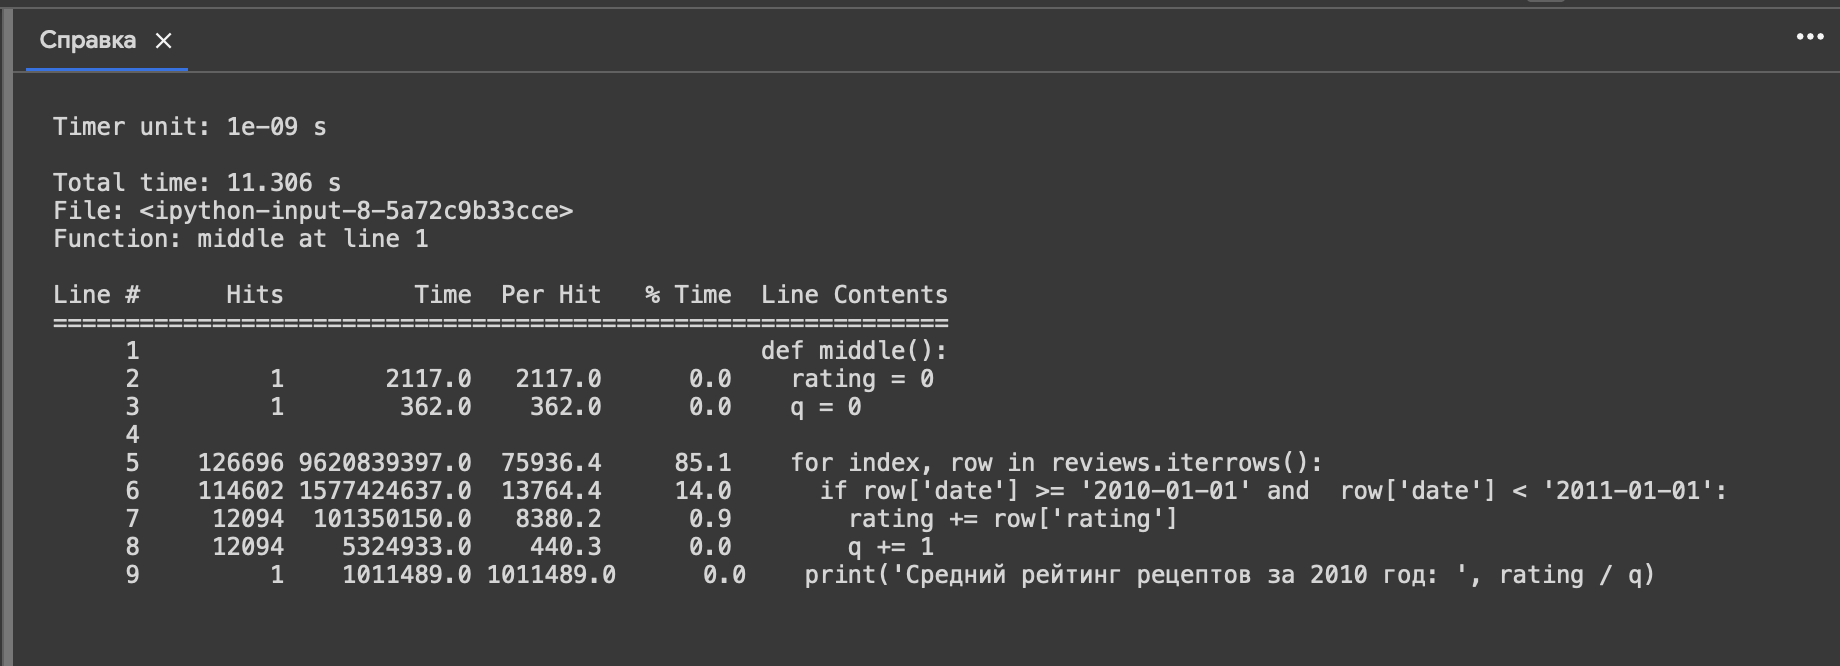

In [ ]:
%lprun -f middle2 middle2()

Средний рейтинг рецептов за 2010 год:  4.4544402182900615


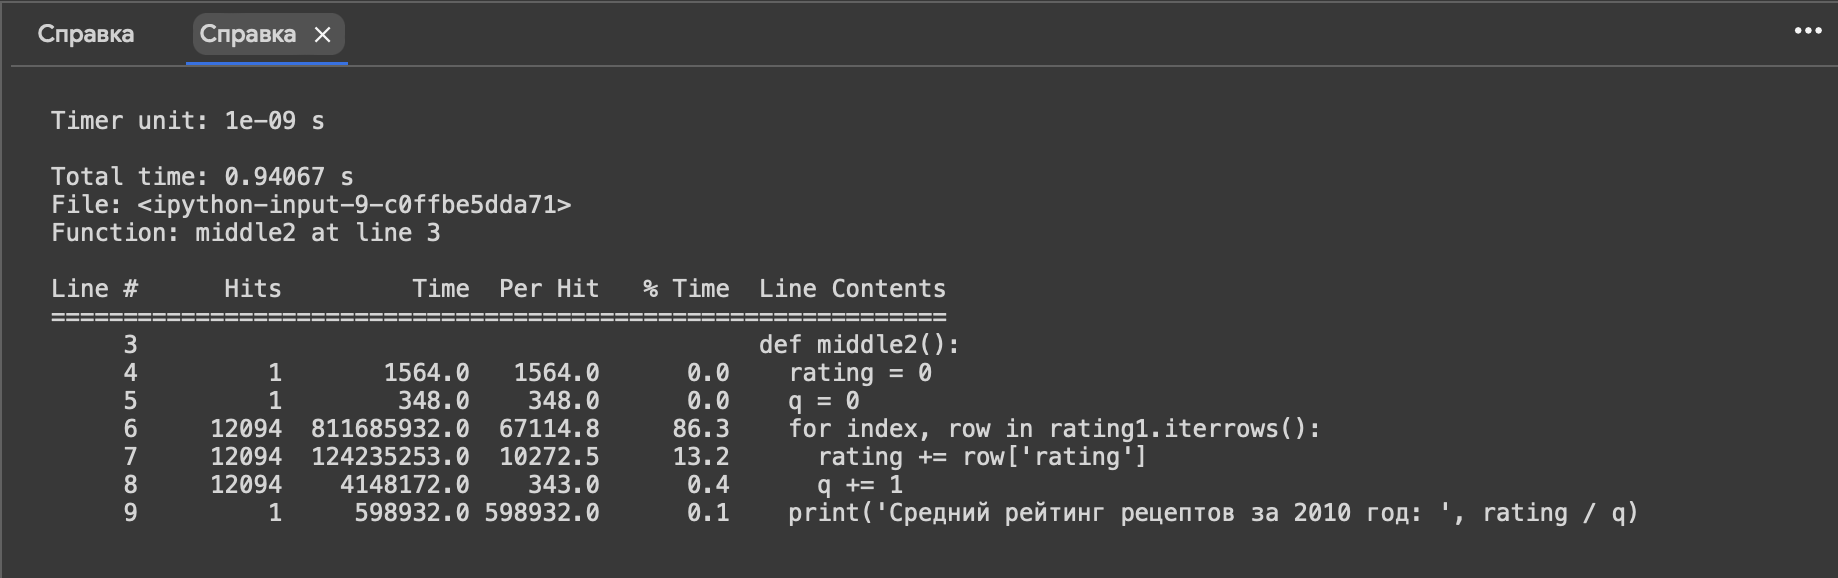

In [ ]:
%lprun -f middle3 middle3()

Средний рейтинг рецептов за 2010 год:  4.4544402182900615


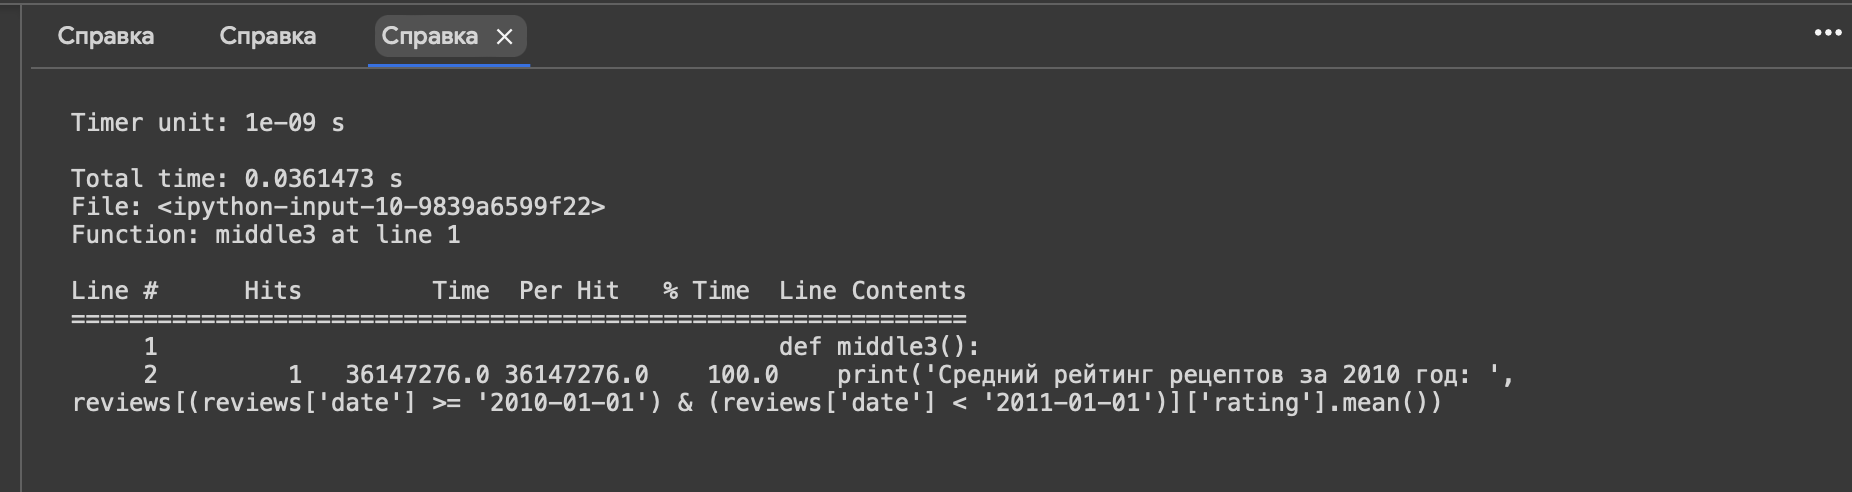

3. Вам предлагается воспользоваться функцией, которая собирает статистику о том, сколько отзывов содержат то или иное слово. Измерьте время выполнения этой функции. Сможете ли вы найти узкие места в коде, используя профайлер? Выпишите (словами), что в имеющемся коде реализовано неоптимально. Оптимизируйте функцию и добейтесь значительного (как минимум, на один порядок) прироста в скорости выполнения.

In [ ]:
@jit
def get_word_reviews_count(df):
    word_reviews = {}
    for _, row in df.dropna(subset=['review']).iterrows():
        recipe_id, review = row['recipe_id'], row['review']
        words = review.split(' ')
        for word in words:
            if word not in word_reviews:
                word_reviews[word] = []
            word_reviews[word].append(recipe_id)
    
    word_reviews_count = {}
    for _, row in df.dropna(subset=['review']).iterrows():
        review = row['review']
        words = review.split(' ')
        for word in words:
            word_reviews_count[word] = len(word_reviews[word])
    return word_reviews_count

%time
# в данной функции используется 4 цикла, что может замедлять работу. Для оптимизации кода необходимо по-возможности избавиться от нескольких циклов 

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.63 µs


In [ ]:
get_word_reviews_count(rating1)

{'This': 3641,
 'soup': 469,
 'is': 5115,
 'so': 4585,
 'comforting.': 8,
 '': 21331,
 'I': 27983,
 'used': 4537,
 'low-sodium,': 1,
 'low-fat': 14,
 'chicken': 986,
 'stock.': 25,
 'butter.': 76,
 'dried': 244,
 'parsley.': 23,
 'So': 459,
 'easy': 1540,
 'to': 12576,
 'do': 670,
 'in': 6071,
 'less': 309,
 'than': 1019,
 'an': 989,
 'hour,': 22,
 "that's": 175,
 'great': 1802,
 ':)': 603,
 'DH': 372,
 'really': 1936,
 'loved': 1334,
 'it.': 1111,
 'Me': 9,
 'too': 1006,
 'of': 10667,
 'course.': 7,
 'Thanks': 2808,
 'Breezermom': 2,
 'Made': 1959,
 'for': 13061,
 'Market': 24,
 'tag': 137,
 'game': 80,
 "We're": 14,
 'addicted': 8,
 'this': 8273,
 'jam': 58,
 '--': 185,
 "it's": 524,
 'delicious!': 363,
 'tend': 23,
 'be': 2362,
 'vinegar-phobic': 1,
 'cut': 716,
 'that': 3609,
 'half;': 4,
 'we': 1210,
 'also': 1443,
 'adore': 9,
 'black': 181,
 'pepper,': 97,
 'increase': 56,
 'it': 10691,
 'by': 668,
 'half.': 62,
 'Also,': 148,
 'once': 147,
 'the': 26432,
 'strawberries': 61,
 '

In [ ]:
%lprun -f get_word_reviews_count get_word_reviews_count(rating1)

/usr/local/lib/python3.10/dist-packages/line_profiler/ipython_extension.py:71: UserWarning: Adding a function with a __wrapped__ attribute. You may want to profile the wrapped function by adding get_word_reviews_count.__wrapped__ instead.
  profile = LineProfiler(*funcs)
<ipython-input-24-c9730ea7c6fc>:1: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "get_word_reviews_count" failed type inference due to: non-precise type pyobject
During: typing of argument at <ipython-input-24-c9730ea7c6fc> (4)

File "<ipython-input-24-c9730ea7c6fc>", line 4:
def get_word_reviews_count(df):
    word_reviews = {}
    ^

  @jit
<ipython-input-24-c9730ea7c6fc>:1: NumbaWarning: 
Compilation is falling back to object mode WITHOUT looplifting enabled because Function "get_word_reviews_count" failed type inference due to: Cannot determine Numba type of <class 'numba.core.dispatcher.LiftedLoop'>

File "<ipython-input-24-c9730ea7c6fc>", line 5:
def get_word_

In [ ]:
@jit
def get_word_reviews_count(df):
    word_reviews_count = {}
    for _, row in df.dropna(subset=['review']).iterrows():
        recipe_id, review = row['recipe_id'], row['review']
        words = review.split(' ')
        for word in words:
            word_reviews_count[word] = word_reviews_count.get(word, 0) + 1
    return word_reviews_count

%time

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.48 µs


In [ ]:
get_word_reviews_count(rating1)

<ipython-input-44-746f8b8aec73>:1: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "get_word_reviews_count" failed type inference due to: non-precise type pyobject
During: typing of argument at <ipython-input-44-746f8b8aec73> (4)

File "<ipython-input-44-746f8b8aec73>", line 4:
def get_word_reviews_count(df):
    word_reviews_count = {}
    ^

  @jit
<ipython-input-44-746f8b8aec73>:1: NumbaWarning: 
Compilation is falling back to object mode WITHOUT looplifting enabled because Function "get_word_reviews_count" failed type inference due to: Cannot determine Numba type of <class 'numba.core.dispatcher.LiftedLoop'>

File "<ipython-input-44-746f8b8aec73>", line 5:
def get_word_reviews_count(df):
    <source elided>
    word_reviews_count = {}
    for _, row in df.dropna(subset=['review']).iterrows():
    ^

  @jit
/usr/local/lib/python3.10/dist-packages/numba/core/object_mode_passes.py:151: NumbaWarning: Function "get_word_reviews_count" 

{'This': 3641,
 'soup': 469,
 'is': 5115,
 'so': 4585,
 'comforting.': 8,
 '': 21331,
 'I': 27983,
 'used': 4537,
 'low-sodium,': 1,
 'low-fat': 14,
 'chicken': 986,
 'stock.': 25,
 'butter.': 76,
 'dried': 244,
 'parsley.': 23,
 'So': 459,
 'easy': 1540,
 'to': 12576,
 'do': 670,
 'in': 6071,
 'less': 309,
 'than': 1019,
 'an': 989,
 'hour,': 22,
 "that's": 175,
 'great': 1802,
 ':)': 603,
 'DH': 372,
 'really': 1936,
 'loved': 1334,
 'it.': 1111,
 'Me': 9,
 'too': 1006,
 'of': 10667,
 'course.': 7,
 'Thanks': 2808,
 'Breezermom': 2,
 'Made': 1959,
 'for': 13061,
 'Market': 24,
 'tag': 137,
 'game': 80,
 "We're": 14,
 'addicted': 8,
 'this': 8273,
 'jam': 58,
 '--': 185,
 "it's": 524,
 'delicious!': 363,
 'tend': 23,
 'be': 2362,
 'vinegar-phobic': 1,
 'cut': 716,
 'that': 3609,
 'half;': 4,
 'we': 1210,
 'also': 1443,
 'adore': 9,
 'black': 181,
 'pepper,': 97,
 'increase': 56,
 'it': 10691,
 'by': 668,
 'half.': 62,
 'Also,': 148,
 'once': 147,
 'the': 26432,
 'strawberries': 61,
 '

4. Напишите несколько версий функции `MAPE` (см. [MAPE](https://en.wikipedia.org/wiki/Mean_absolute_percentage_error)) для расчета среднего абсолютного процентного отклонения значения рейтинга отзыва на рецепт от среднего значения рейтинга по всем отзывам для этого рецепта. 
    1. Без использования векторизованных операций и методов массивов `numpy` и без использования `numba`
    2. Без использования векторизованных операций и методов массивов `numpy`, но с использованием `numba`
    3. С использованием векторизованных операций и методов массивов `numpy`, но без использования `numba`
    4. C использованием векторизованных операций и методов массивов `numpy` и `numba`
    
Измерьте время выполнения каждой из реализаций.

Замечание: удалите из выборки отзывы с нулевым рейтингом.


In [ ]:
new_reviews = reviews[reviews['rating'] != 0]
new_reviews

,Unnamed: 0,user_id,recipe_id,date,rating,review
0,370476,21752,57993,2003-05-01,5,Last week whole sides of frozen salmon fillet ...
1,624300,431813,142201,2007-09-16,5,So simple and so tasty! I used a yellow capsi...
2,187037,400708,252013,2008-01-10,4,"Very nice breakfast HH, easy to make and yummy..."
3,706134,2001852463,404716,2017-12-11,5,These are a favorite for the holidays and so e...
4,312179,95810,129396,2008-03-14,5,Excellent soup! The tomato flavor is just gre...
...,...,...,...,...,...,...
126690,344676,724631,314698,2008-10-14,5,"5 Stars, The Hunter said the mushrooms and sau..."
126691,1013457,1270706,335534,2009-05-17,4,This recipe was great! I made it last night. I...
126693,1059834,689540,222001,2008-04-08,5,"Well, we were not a crowd but it was a fabulou..."
126694,453285,2000242659,354979,2015-06-02,5,I have been a steak eater and dedicated BBQ gr...


In [ ]:
def mape1():
  rating = new_reviews['rating']
  mean_rating = new_reviews['rating'].mean()
  abs_perc_diff = abs((rating - mean_rating) / mean_rating)
  return abs_perc_diff.mean() * 100

mape1()
%time

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 9.78 µs


In [ ]:
@jit
def mape2():
  rating = new_reviews['rating']
  mean_rating = new_reviews['rating'].mean()
  abs_perc_diff = abs((rating - mean_rating) / mean_rating)
  return abs_perc_diff.mean() * 100

mape2()
%time

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.44 µs


<ipython-input-114-0b5501989ce8>:3: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "mape2" failed type inference due to: Untyped global name 'new_reviews': Cannot determine Numba type of <class 'pandas.core.frame.DataFrame'>

File "<ipython-input-114-0b5501989ce8>", line 5:
def mape2():
  rating = new_reviews['rating']
  ^

  @jit
/usr/local/lib/python3.10/dist-packages/numba/core/object_mode_passes.py:151: NumbaWarning: Function "mape2" was compiled in object mode without forceobj=True.

File "<ipython-input-114-0b5501989ce8>", line 4:
@jit
def mape2():
^

  warnings.warn(errors.NumbaWarning(warn_msg,
/usr/local/lib/python3.10/dist-packages/numba/core/object_mode_passes.py:161: NumbaDeprecationWarning: 
Fall-back from the nopython compilation path to the object mode compilation path has been detected, this is deprecated behaviour.

For more information visit https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecati

In [ ]:
import numpy as np

def mape3():
  rating, mean_rating = np.array(new_reviews['rating']), np.array(new_reviews['rating'].mean())
  return np.mean(np.abs((rating - mean_rating) / mean_rating)) * 100
  
mape3()
%time

CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 9.06 µs


In [ ]:
@jit
def mape4():
  rating, mean_rating = np.array(new_reviews['rating']), np.array(new_reviews['rating'].mean())
  return np.mean(np.abs((rating - mean_rating) / mean_rating)) * 100

mape4()
%time

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.01 µs


<ipython-input-106-84859ab9bb25>:1: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "mape4" failed type inference due to: Untyped global name 'new_reviews': Cannot determine Numba type of <class 'pandas.core.frame.DataFrame'>

File "<ipython-input-106-84859ab9bb25>", line 3:
def mape4():
  rating, mean_rating = np.array(new_reviews['rating']), np.array(new_reviews['rating'].mean())
  ^

  @jit
/usr/local/lib/python3.10/dist-packages/numba/core/object_mode_passes.py:151: NumbaWarning: Function "mape4" was compiled in object mode without forceobj=True.

File "<ipython-input-106-84859ab9bb25>", line 2:
@jit
def mape4():
^

  warnings.warn(errors.NumbaWarning(warn_msg,
/usr/local/lib/python3.10/dist-packages/numba/core/object_mode_passes.py:161: NumbaDeprecationWarning: 
Fall-back from the nopython compilation path to the object mode compilation path has been detected, this is deprecated behaviour.

For more information visit https://numb